In [ ]:
# Sumani
# 28-7-2024

In [ ]:
import torch # Torch for tensor operations
import torch.nn as nn # model architecture and activation
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load the Dataset
iris = load_iris()

In [4]:
# Examine the dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# Examine the dataset
print (df['target'].value_counts())
print (iris.target_names)

target
0    50
1    50
2    50
Name: count, dtype: int64
['setosa' 'versicolor' 'virginica']


In [6]:
# Split the dataset for training and testing
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [7]:
# Convert the dataset to tensor format
X_tr_tensor = torch.tensor(X_train, dtype=torch.float32) # Convert to float32 for PyTorch
y_tr_tensor = torch.tensor(y_train, dtype=torch.long) # Convert to long for PyTorch

In [8]:
print(X_tr_tensor.shape, y_tr_tensor.shape)

torch.Size([120, 4]) torch.Size([120])


In [11]:
class FullyConnectedNN(nn.Module):
    def __init__(self):
        super().__init__()

        # First Layer
        self.layer_1 = nn.Linear(4, 64)     # Input layer to 64 neurons
        self.activation_1 = nn.ReLU()       # ReLU activation function

        # Second Layer
        self.layer_2 = nn.Linear(64, 16)    # 64 neurons to 16 neurons
        self.activation_2 = nn.ReLU()       # Another ReLU

        # Third and the final Layer
        self.layer_3 = nn.Linear(16, 3)     # Output layer to 3 neurons (classes)

    def forward(self, x):
        # Forward pass
        x = self.layer_1(x) # Input to first layer
        x = self.activation_1(x) # Activation function after first layer
        x = self.layer_2(x) # Input to second layer
        x = self.activation_2(x) # Activation function after second layer
        x = self.layer_3(x) # Input to final layer
        return x # Input to final layer

In [12]:
def train_model(model):    
    epochs = 400
    loss_arr = []

    # Use CrossEntropyLoss as our loss function.
    # This is suitable for multi-class classification problems.
    # It combines softmax and negative log likelihood loss in one function.
    # It expects the model's output to be raw scores (logits) and the target
    # to be class indices.
    # The model's output will be transformed into probabilities using softmax.
    # The loss function will then compute the negative log likelihood loss.
    # This is a common choice for multi-class classification tasks.
    loss_fn = nn.CrossEntropyLoss()

    # Use Adam optimizer for adjusting the weights.
    # Learning rate of 0.002 is a common choice for Adam optimizer.
    optim = torch.optim.Adam(model.parameters(), lr=0.002)

    for epoch in range(epochs):
        # forward pass
        ypred = model(X_tr_tensor)

        # calculate loss
        loss = loss_fn(ypred, y_tr_tensor)
        loss_arr.append(loss.item())

        # backward pass
        loss.backward() # Compute gradients of the loss with respect to model parameters
        optim.step() # Update the model parameters based on the gradients
        optim.zero_grad() # Reset gradients to zero for the next iteration
    
    # Plot the loss over epochs to visualize the learning process.
    plt.plot(loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.show()

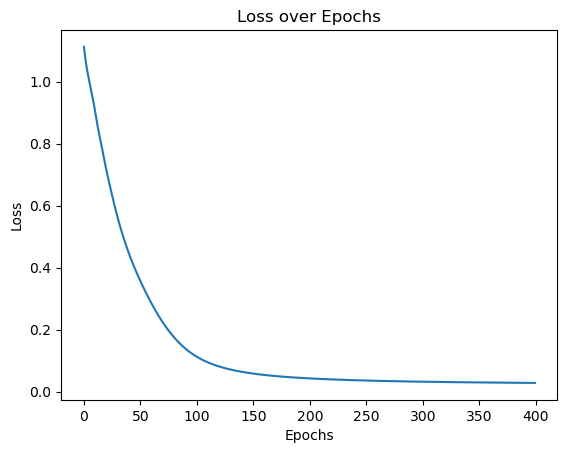

In [13]:
model = FullyConnectedNN()
train_model(model)

In [14]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32) # Convert to float32 for PyTorch
y_test_pred = model(X_test_tensor) # Forward pass to get predictions
y_test_pred = torch.argmax(y_test_pred, dim=1) # Get predicted class labels

In [40]:
X_test_tensor

tensor([[4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [5.0000, 3.2000, 1.2000, 0.2000],
        [6.1000, 2.6000, 5.6000, 1.4000],
        [7.0000, 3.2000, 4.7000, 1.4000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [5.9000, 3.0000, 5.1000, 1.8000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [4.9000, 2.4000, 3.3000, 1.0000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [6.2000, 2.9000, 4.3000, 1

In [33]:
y_test

array([0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 1, 0,
       2, 1, 0, 0, 0, 1, 0, 0])

In [32]:
y_test_pred

tensor([0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 1,
        0, 0, 0, 1, 0, 0])

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

print("Accuracy:", accuracy_score(y_test_pred, y_test)) # Calculate accuracy

Accuracy: 0.9666666666666667


In [31]:
# Check the prediction for a specific test sample 1
print(f'predicted class {y_test_pred[1]}') # Check the prediction for a specific test sample
print(f'actual class {y_test[1]}') # Check the actual label for the same sample

predicted class 0
actual class 0


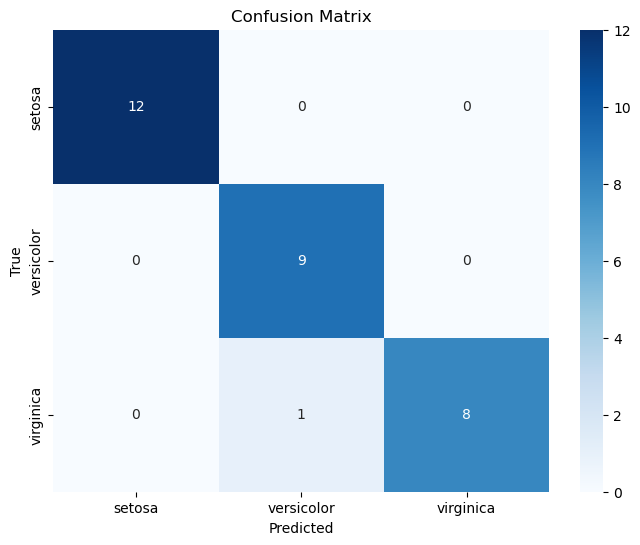

In [16]:
confused_matrix = confusion_matrix(y_test_pred, y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confused_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Print the output of the final layer
print("=== Final Layer Output Analysis ===")

# Get raw output (logits) from the model
model.eval()  # Set to evaluation mode
with torch.no_grad():
    raw_output = model(X_test_tensor)  # Raw logits from final layer
    probabilities = torch.softmax(raw_output, dim=1)  # Convert to probabilities
    predictions = torch.argmax(probabilities, dim=1)  # Get predicted classes

# Display results for first 10 test samples
print("\nFirst 10 Test Samples:")
print("Sample | Raw Output (Logits)                    | Probabilities                         | Predicted | Actual")
print("-" * 100)

for i in range(min(10, len(X_test_tensor))):
    logits = raw_output[i].numpy()
    probs = probabilities[i].numpy()
    pred = predictions[i].item()
    actual = y_test[i]
    
    logits_str = f"[{logits[0]:6.2f}, {logits[1]:6.2f}, {logits[2]:6.2f}]"
    probs_str = f"[{probs[0]:.3f}, {probs[1]:.3f}, {probs[2]:.3f}]"
    
    print(f"{i+1:6d} | {logits_str:38s} | {probs_str:37s} | {pred:9d} | {actual:6d}")

print(f"\nClass names: {iris.target_names}")
print("0=Setosa, 1=Versicolor, 2=Virginica")

=== Final Layer Output Analysis ===

First 10 Test Samples:
Sample | Raw Output (Logits)                    | Probabilities                         | Predicted | Actual
----------------------------------------------------------------------------------------------------
     1 | [ 12.68,   5.72, -15.47]               | [0.999, 0.001, 0.000]                 |         0 |      0
     2 | [ 12.45,   5.59, -15.18]               | [0.999, 0.001, 0.000]                 |         0 |      0
     3 | [ -5.88,   4.63,   4.23]               | [0.000, 0.600, 0.400]                 |         1 |      1
     4 | [ 12.12,   5.60, -14.85]               | [0.999, 0.001, 0.000]                 |         0 |      0
     5 | [ 13.14,   5.87, -15.99]               | [0.999, 0.001, 0.000]                 |         0 |      0
     6 | [ -8.70,   2.99,   8.84]               | [0.000, 0.003, 0.997]                 |         2 |      2
     7 | [ -2.03,   7.49,  -2.07]               | [0.000, 1.000, 0.000]     

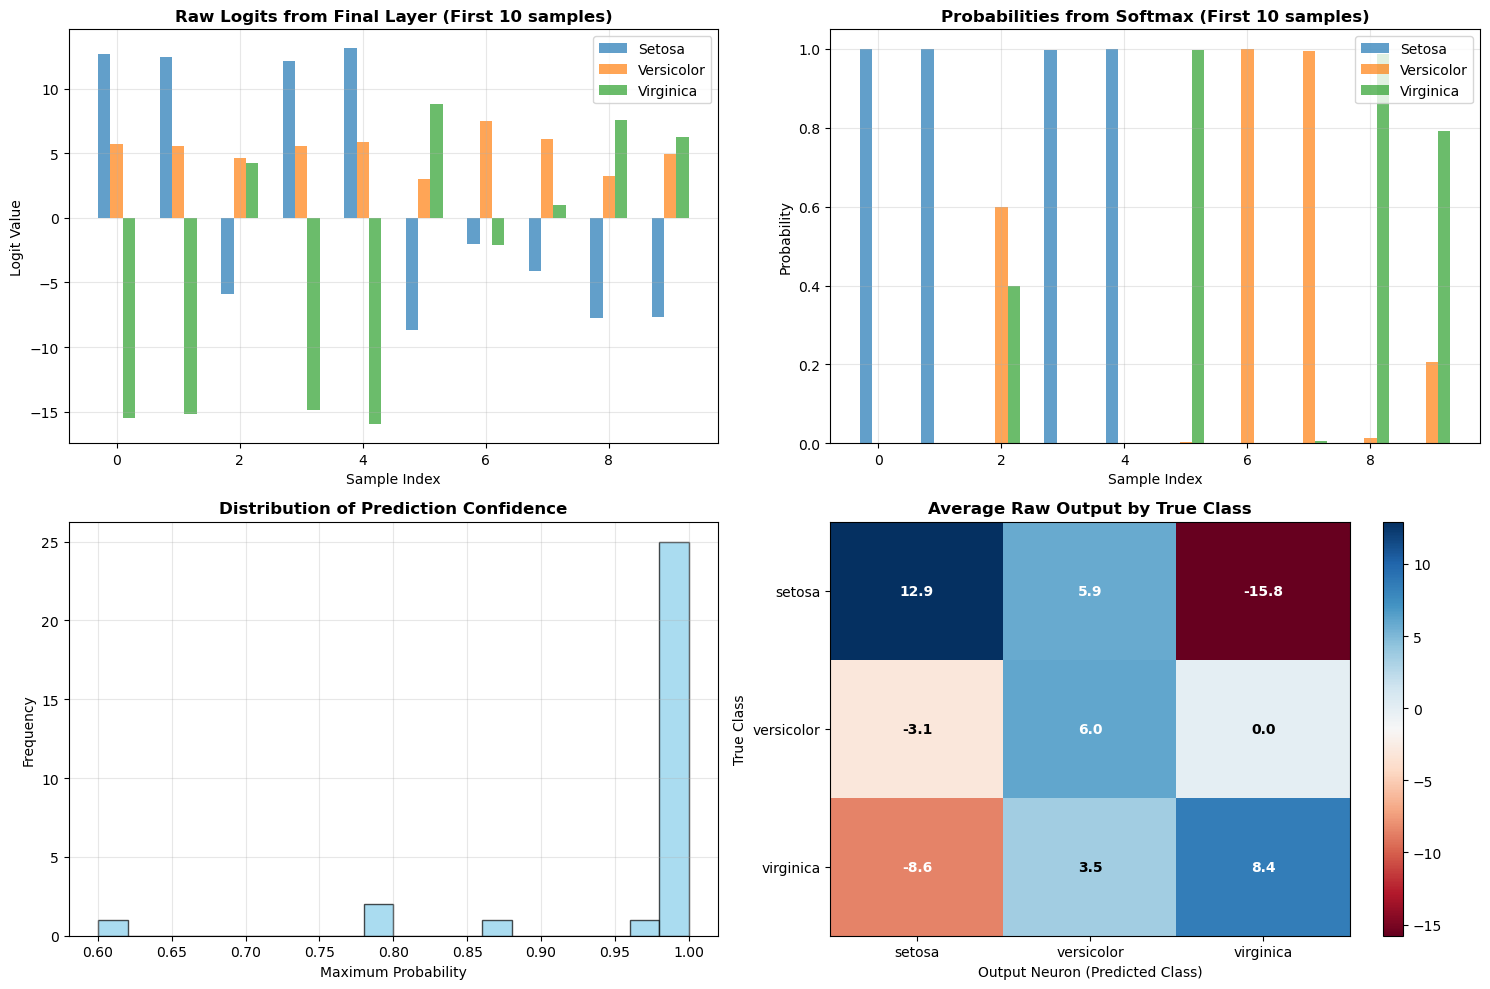


Summary Statistics:
Average confidence (max probability): 0.966
Minimum confidence: 0.600
Maximum confidence: 1.000
Samples with confidence > 0.9: 26/30 (86.7%)


In [36]:
# Visualize the final layer outputs
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Raw logits for first 10 samples
sample_indices = range(min(10, len(X_test_tensor)))
logits_data = raw_output[:10].numpy()

axes[0, 0].bar(np.arange(len(sample_indices)) - 0.2, logits_data[:, 0], 0.2, label='Setosa', alpha=0.7)
axes[0, 0].bar(np.arange(len(sample_indices)), logits_data[:, 1], 0.2, label='Versicolor', alpha=0.7)
axes[0, 0].bar(np.arange(len(sample_indices)) + 0.2, logits_data[:, 2], 0.2, label='Virginica', alpha=0.7)
axes[0, 0].set_title('Raw Logits from Final Layer (First 10 samples)', fontweight='bold')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Logit Value')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Probabilities for first 10 samples
prob_data = probabilities[:10].numpy()

axes[0, 1].bar(np.arange(len(sample_indices)) - 0.2, prob_data[:, 0], 0.2, label='Setosa', alpha=0.7)
axes[0, 1].bar(np.arange(len(sample_indices)), prob_data[:, 1], 0.2, label='Versicolor', alpha=0.7)
axes[0, 1].bar(np.arange(len(sample_indices)) + 0.2, prob_data[:, 2], 0.2, label='Virginica', alpha=0.7)
axes[0, 1].set_title('Probabilities from Softmax (First 10 samples)', fontweight='bold')
axes[0, 1].set_xlabel('Sample Index')
axes[0, 1].set_ylabel('Probability')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Distribution of max probabilities (confidence)
max_probs = torch.max(probabilities, dim=1)[0].numpy()
axes[1, 0].hist(max_probs, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Distribution of Prediction Confidence', fontweight='bold')
axes[1, 0].set_xlabel('Maximum Probability')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Average output per class
avg_output_by_class = np.zeros((3, 3))  # 3 true classes, 3 output neurons
for true_class in range(3):
    mask = y_test == true_class
    if np.any(mask):
        avg_output_by_class[true_class] = raw_output[mask].mean(dim=0).numpy()

im = axes[1, 1].imshow(avg_output_by_class, cmap='RdBu', aspect='auto')
axes[1, 1].set_title('Average Raw Output by True Class', fontweight='bold')
axes[1, 1].set_xlabel('Output Neuron (Predicted Class)')
axes[1, 1].set_ylabel('True Class')
axes[1, 1].set_xticks(range(3))
axes[1, 1].set_yticks(range(3))
axes[1, 1].set_xticklabels(iris.target_names)
axes[1, 1].set_yticklabels(iris.target_names)

# Add text annotations
for i in range(3):
    for j in range(3):
        axes[1, 1].text(j, i, f'{avg_output_by_class[i, j]:.1f}', 
                       ha='center', va='center', fontweight='bold',
                       color='white' if abs(avg_output_by_class[i, j]) > 5 else 'black')

plt.colorbar(im, ax=axes[1, 1])
plt.tight_layout()
plt.show()

print(f"\nSummary Statistics:")
print(f"Average confidence (max probability): {max_probs.mean():.3f}")
print(f"Minimum confidence: {max_probs.min():.3f}")
print(f"Maximum confidence: {max_probs.max():.3f}")
print(f"Samples with confidence > 0.9: {(max_probs > 0.9).sum()}/{len(max_probs)} ({(max_probs > 0.9).mean()*100:.1f}%)")

# Neural Network Visualization

There are several ways to visualize a neural network architecture:

1. **Model Summary**: Text-based representation showing layers, parameters, and output shapes
2. **Architecture Diagram**: Visual representation of the network structure  
3. **Computational Graph**: Shows the flow of data through operations
4. **Weight/Parameter Visualization**: Visualize learned weights and biases
5. **Activation Maps**: Visualize what neurons are learning

Let's explore these different visualization techniques:

In [37]:
# 1. Model Summary - Simple text representation
print("=== Model Architecture Summary ===")
print(model)
print("\n=== Model Parameters ===")
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")

# Display layer-by-layer information
print("\n=== Layer Details ===")
for name, param in model.named_parameters():
    print(f"{name}: {param.shape} ({param.numel()} parameters)")

=== Model Architecture Summary ===
FullyConnectedNN(
  (layer_1): Linear(in_features=4, out_features=64, bias=True)
  (activation_1): ReLU()
  (layer_2): Linear(in_features=64, out_features=16, bias=True)
  (activation_2): ReLU()
  (layer_3): Linear(in_features=16, out_features=3, bias=True)
)

=== Model Parameters ===
Total parameters: 1411
Trainable parameters: 1411

=== Layer Details ===
layer_1.weight: torch.Size([64, 4]) (256 parameters)
layer_1.bias: torch.Size([64]) (64 parameters)
layer_2.weight: torch.Size([16, 64]) (1024 parameters)
layer_2.bias: torch.Size([16]) (16 parameters)
layer_3.weight: torch.Size([3, 16]) (48 parameters)
layer_3.bias: torch.Size([3]) (3 parameters)


In [38]:
# Detailed Analysis of Trainable Parameters
print("=== DETAILED TRAINABLE PARAMETERS ANALYSIS ===\n")

# 1. Count parameters by category
total_params = 0
trainable_params = 0
weight_params = 0
bias_params = 0

print("1. Parameter Breakdown by Layer:")
print("-" * 60)
for name, param in model.named_parameters():
    param_count = param.numel()
    total_params += param_count
    
    if param.requires_grad:
        trainable_params += param_count
        
    if 'weight' in name:
        weight_params += param_count
    elif 'bias' in name:
        bias_params += param_count
    
    # Show parameter details
    print(f"{name:15s} | Shape: {str(param.shape):15s} | Count: {param_count:4d} | Trainable: {param.requires_grad}")

print("-" * 60)
print(f"{'TOTALS':15s} | {'':15s} | {'':4s} {total_params:4d} | {'':10s}")

# 2. Summary statistics
print(f"\n2. Parameter Summary:")
print(f"   Total parameters:     {total_params:,}")
print(f"   Trainable parameters: {trainable_params:,}")
print(f"   Weight parameters:    {weight_params:,} ({weight_params/total_params*100:.1f}%)")
print(f"   Bias parameters:      {bias_params:,} ({bias_params/total_params*100:.1f}%)")

# 3. Memory usage estimation
param_memory_mb = total_params * 4 / (1024 * 1024)  # Assuming float32 (4 bytes per parameter)
print(f"   Memory usage (approx): {param_memory_mb:.3f} MB")

# 4. Parameter distribution by layer
print(f"\n3. Parameter Distribution by Layer:")
layer_params = {}
for name, param in model.named_parameters():
    layer_name = name.split('.')[0]  # Get layer name (e.g., 'layer_1', 'layer_2')
    if layer_name not in layer_params:
        layer_params[layer_name] = 0
    layer_params[layer_name] += param.numel()

for layer_name, count in layer_params.items():
    percentage = count / total_params * 100
    print(f"   {layer_name:10s}: {count:4d} parameters ({percentage:5.1f}%)")

# 5. Check if any parameters are frozen
frozen_params = sum(p.numel() for p in model.parameters() if not p.requires_grad)
print(f"\n4. Training Status:")
print(f"   Frozen parameters:    {frozen_params}")
print(f"   All parameters trainable: {'Yes' if frozen_params == 0 else 'No'}")

# 6. Parameter value statistics
print(f"\n5. Parameter Value Statistics:")
all_weights = torch.cat([p.data.flatten() for p in model.parameters()])
print(f"   Min value:    {all_weights.min().item():.6f}")
print(f"   Max value:    {all_weights.max().item():.6f}")
print(f"   Mean value:   {all_weights.mean().item():.6f}")
print(f"   Std value:    {all_weights.std().item():.6f}")
print(f"   Zero params:  {(all_weights == 0).sum().item()} ({(all_weights == 0).float().mean().item()*100:.2f}%)")

=== DETAILED TRAINABLE PARAMETERS ANALYSIS ===

1. Parameter Breakdown by Layer:
------------------------------------------------------------
layer_1.weight  | Shape: torch.Size([64, 4]) | Count:  256 | Trainable: True
layer_1.bias    | Shape: torch.Size([64]) | Count:   64 | Trainable: True
layer_2.weight  | Shape: torch.Size([16, 64]) | Count: 1024 | Trainable: True
layer_2.bias    | Shape: torch.Size([16]) | Count:   16 | Trainable: True
layer_3.weight  | Shape: torch.Size([3, 16]) | Count:   48 | Trainable: True
layer_3.bias    | Shape: torch.Size([3]) | Count:    3 | Trainable: True
------------------------------------------------------------
TOTALS          |                 |      1411 |           

2. Parameter Summary:
   Total parameters:     1,411
   Trainable parameters: 1,411
   Weight parameters:    1,328 (94.1%)
   Bias parameters:      83 (5.9%)
   Memory usage (approx): 0.005 MB

3. Parameter Distribution by Layer:
   layer_1   :  320 parameters ( 22.7%)
   layer_2   :

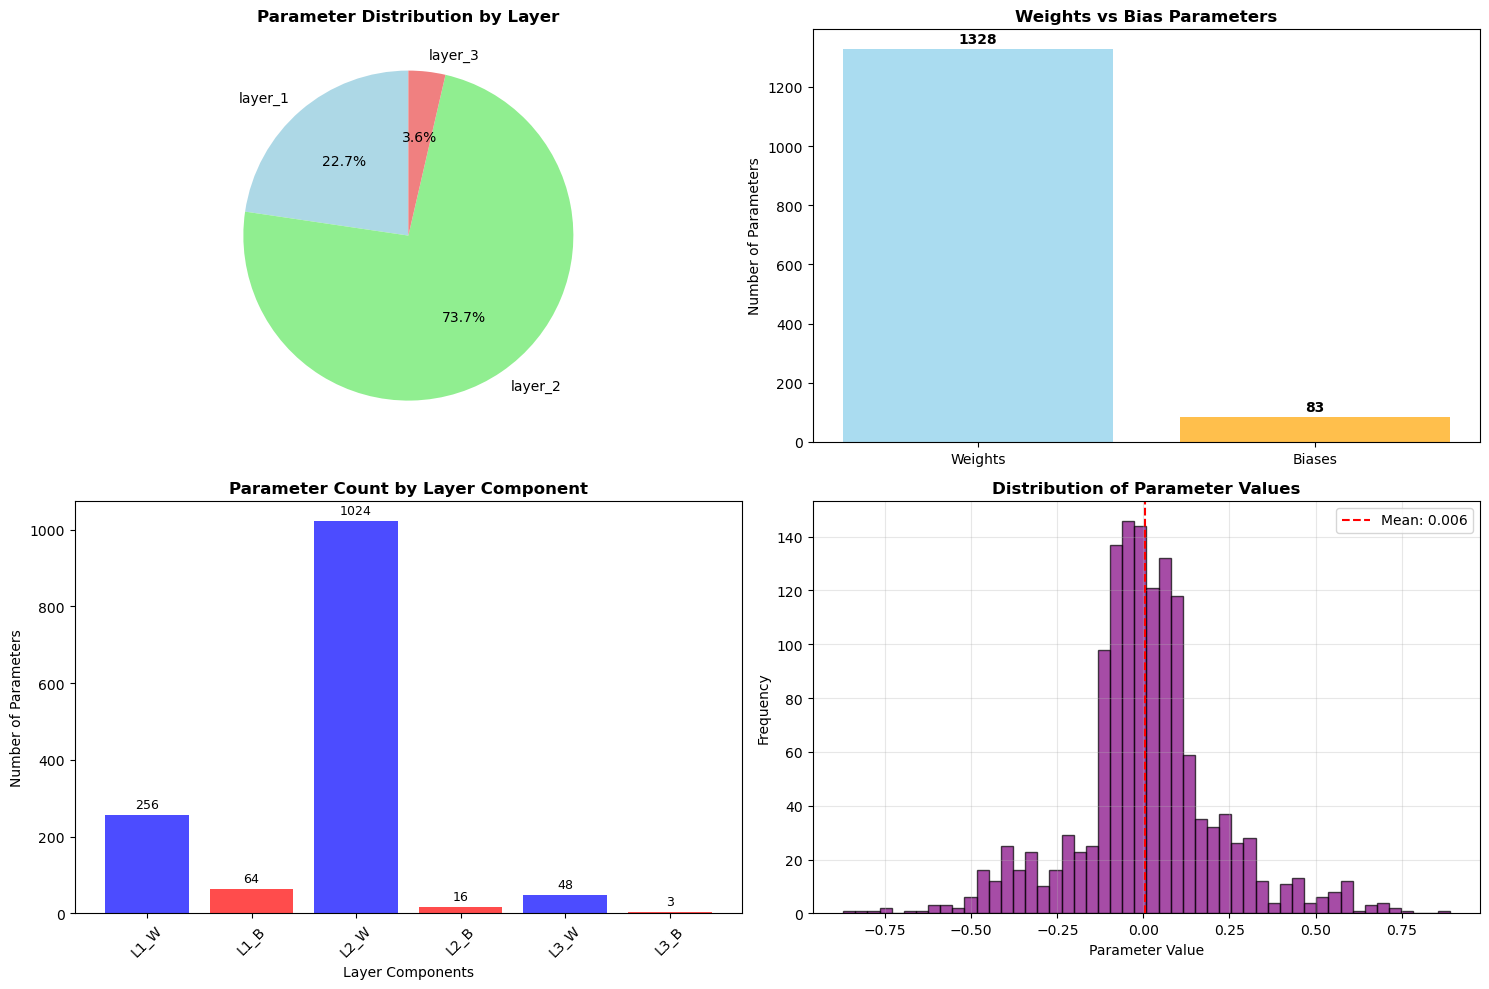


=== TRAINABLE PARAMETERS SUMMARY TABLE ===
┌─────────────────┬──────────┬─────────────┬──────────────┐
│ Layer Component │ Shape    │ Parameters  │ Percentage   │
├─────────────────┼──────────┼─────────────┼──────────────┤
│ layer_1.weight  │ 64×4     │         256 │        18.1% │
│ layer_1.bias    │ 64       │          64 │         4.5% │
│ layer_2.weight  │ 16×64    │       1,024 │        72.6% │
│ layer_2.bias    │ 16       │          16 │         1.1% │
│ layer_3.weight  │ 3×16     │          48 │         3.4% │
│ layer_3.bias    │ 3        │           3 │         0.2% │
├─────────────────┼──────────┼─────────────┼──────────────┤
│ TOTAL           │          │       1,411 │ 100.0%      │
└─────────────────┴──────────┴─────────────┴──────────────┘


In [39]:
# Visualize Trainable Parameters
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Parameter count by layer (pie chart)
layer_names = list(layer_params.keys())
layer_counts = list(layer_params.values())
colors = ['lightblue', 'lightgreen', 'lightcoral']

axes[0, 0].pie(layer_counts, labels=layer_names, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 0].set_title('Parameter Distribution by Layer', fontweight='bold')

# 2. Weight vs Bias parameters (bar chart)
categories = ['Weights', 'Biases']
param_counts = [weight_params, bias_params]
bars = axes[0, 1].bar(categories, param_counts, color=['skyblue', 'orange'], alpha=0.7)
axes[0, 1].set_title('Weights vs Bias Parameters', fontweight='bold')
axes[0, 1].set_ylabel('Number of Parameters')

# Add value labels on bars
for bar, count in zip(bars, param_counts):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 10,
                   f'{count}', ha='center', va='bottom', fontweight='bold')

# 3. Parameter count per layer (detailed bar chart)
layer_details = []
layer_labels = []
for name, param in model.named_parameters():
    layer_details.append(param.numel())
    layer_labels.append(name.replace('layer_', 'L').replace('.weight', '_W').replace('.bias', '_B'))

bars = axes[1, 0].bar(range(len(layer_details)), layer_details, 
                     color=['blue' if 'W' in label else 'red' for label in layer_labels], alpha=0.7)
axes[1, 0].set_title('Parameter Count by Layer Component', fontweight='bold')
axes[1, 0].set_xlabel('Layer Components')
axes[1, 0].set_ylabel('Number of Parameters')
axes[1, 0].set_xticks(range(len(layer_labels)))
axes[1, 0].set_xticklabels(layer_labels, rotation=45)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, layer_details)):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 10,
                   f'{count}', ha='center', va='bottom', fontsize=9)

# 4. Parameter value distribution histogram
all_weights_np = all_weights.numpy()
axes[1, 1].hist(all_weights_np, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].set_title('Distribution of Parameter Values', fontweight='bold')
axes[1, 1].set_xlabel('Parameter Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(all_weights_np.mean(), color='red', linestyle='--', 
                  label=f'Mean: {all_weights_np.mean():.3f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table
print("\n=== TRAINABLE PARAMETERS SUMMARY TABLE ===")
print("┌─────────────────┬──────────┬─────────────┬──────────────┐")
print("│ Layer Component │ Shape    │ Parameters  │ Percentage   │")
print("├─────────────────┼──────────┼─────────────┼──────────────┤")
for name, param in model.named_parameters():
    shape_str = f"{param.shape[0]}×{param.shape[1]}" if len(param.shape) == 2 else f"{param.shape[0]}"
    count = param.numel()
    percentage = count / total_params * 100
    print(f"│ {name:15s} │ {shape_str:8s} │ {count:11,d} │ {percentage:11.1f}% │")
print("├─────────────────┼──────────┼─────────────┼──────────────┤")
print(f"│ {'TOTAL':15s} │ {'':8s} │ {total_params:11,d} │ {'100.0%':11s} │")
print("└─────────────────┴──────────┴─────────────┴──────────────┘")

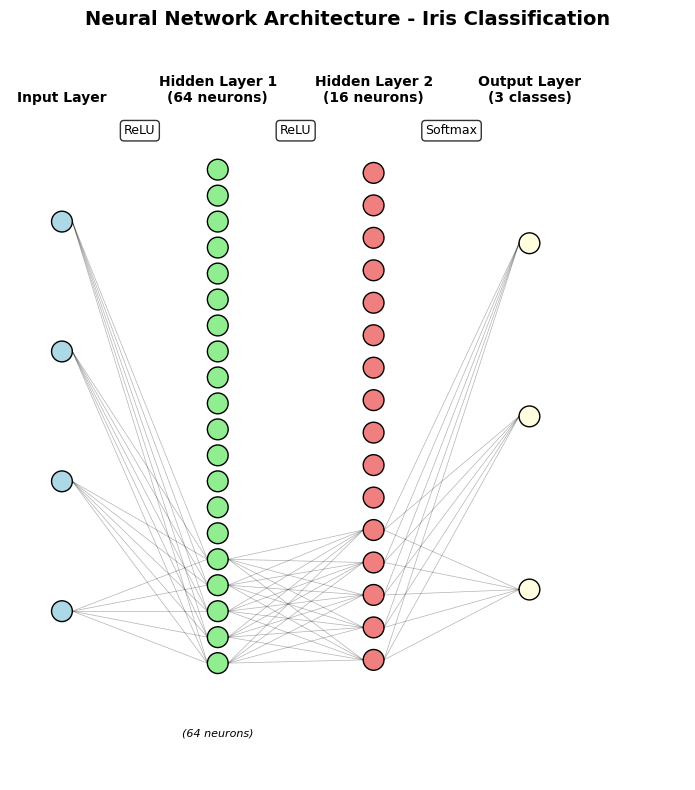

In [18]:
# 2. Custom Architecture Visualization using matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import numpy as np

def visualize_network_architecture(model, input_size=4):
    """
    Create a custom visualization of the neural network architecture
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Define layer information
    layers = [
        {"name": "Input Layer", "size": input_size, "color": "lightblue"},
        {"name": "Hidden Layer 1\n(64 neurons)", "size": 64, "color": "lightgreen"},
        {"name": "Hidden Layer 2\n(16 neurons)", "size": 16, "color": "lightcoral"},
        {"name": "Output Layer\n(3 classes)", "size": 3, "color": "lightyellow"}
    ]
    
    # Position parameters
    layer_width = 2.0
    max_height = 10.0
    x_spacing = 3.0
    
    # Draw layers
    for i, layer in enumerate(layers):
        x = i * x_spacing
        
        # Calculate node spacing for this layer
        node_count = min(layer["size"], 20)  # Limit visual nodes for large layers
        node_height = max_height / max(node_count, 1)
        
        # Draw nodes
        for j in range(node_count):
            y = j * node_height - (node_count - 1) * node_height / 2
            circle = plt.Circle((x, y), 0.2, color=layer["color"], ec='black', linewidth=1)
            ax.add_patch(circle)
        
        # Add layer label
        ax.text(x, max_height/2 + 1, layer["name"], ha='center', va='bottom', 
                fontweight='bold', fontsize=10)
        
        # Add neuron count if abbreviated
        if layer["size"] > 20:
            ax.text(x, -max_height/2 - 1, f"({layer['size']} neurons)", 
                   ha='center', va='top', fontsize=8, style='italic')
        
        # Draw connections to next layer
        if i < len(layers) - 1:
            next_layer = layers[i + 1]
            next_node_count = min(next_layer["size"], 20)
            next_node_height = max_height / max(next_node_count, 1)
            
            # Draw some representative connections
            for j in range(min(node_count, 5)):  # Limit connections for clarity
                y1 = j * node_height - (node_count - 1) * node_height / 2
                for k in range(min(next_node_count, 5)):
                    y2 = k * next_node_height - (next_node_count - 1) * next_node_height / 2
                    ax.plot([x + 0.2, x + x_spacing - 0.2], [y1, y2], 
                           'k-', alpha=0.3, linewidth=0.5)
    
    # Set plot properties
    ax.set_xlim(-1, len(layers) * x_spacing)
    ax.set_ylim(-max_height/2 - 2, max_height/2 + 2)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Neural Network Architecture - Iris Classification', 
                fontsize=14, fontweight='bold', pad=20)
    
    # Add activation functions
    activations = ["Input", "ReLU", "ReLU", "Softmax"]
    for i, activation in enumerate(activations[1:], 1):
        x = (i - 1) * x_spacing + x_spacing/2
        ax.text(x, max_height/2 + 0.5, f"{activation}", ha='center', va='center',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
               fontsize=9)
    
    plt.tight_layout()
    plt.show()

# Visualize the network
visualize_network_architecture(model)

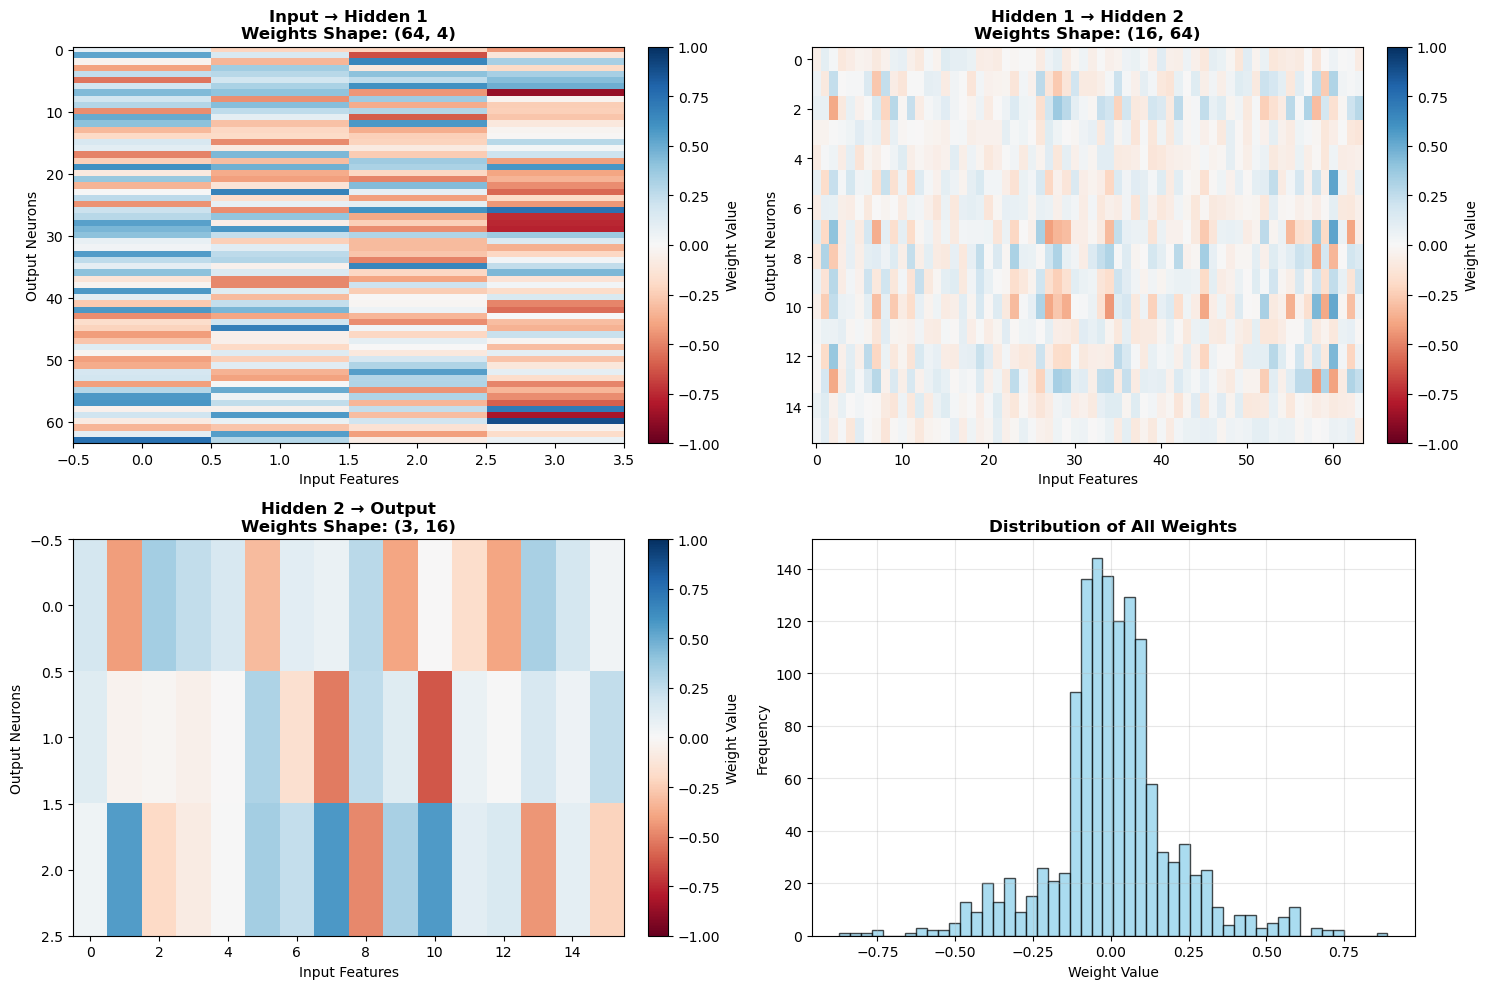

In [19]:
# 3. Weight Visualization
def visualize_weights(model):
    """
    Visualize the learned weights of the neural network
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    layer_names = ['layer_1', 'layer_2', 'layer_3']
    layer_titles = ['Input → Hidden 1', 'Hidden 1 → Hidden 2', 'Hidden 2 → Output']
    
    for i, (layer_name, title) in enumerate(zip(layer_names, layer_titles)):
        layer = getattr(model, layer_name)
        weights = layer.weight.data.numpy()
        
        # Plot weights as heatmap
        im = axes[i].imshow(weights, cmap='RdBu', aspect='auto', vmin=-1, vmax=1)
        axes[i].set_title(f'{title}\nWeights Shape: {weights.shape}', fontweight='bold')
        axes[i].set_xlabel('Input Features')
        axes[i].set_ylabel('Output Neurons')
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
        cbar.set_label('Weight Value')
        
        # Add text annotations for small weight matrices
        if weights.shape[0] <= 10 and weights.shape[1] <= 10:
            for row in range(weights.shape[0]):
                for col in range(weights.shape[1]):
                    axes[i].text(col, row, f'{weights[row, col]:.2f}', 
                               ha='center', va='center', fontsize=8,
                               color='white' if abs(weights[row, col]) > 0.5 else 'black')
    
    # Plot weight distribution
    all_weights = []
    for layer_name in layer_names:
        layer = getattr(model, layer_name)
        all_weights.extend(layer.weight.data.numpy().flatten())
    
    axes[3].hist(all_weights, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[3].set_title('Distribution of All Weights', fontweight='bold')
    axes[3].set_xlabel('Weight Value')
    axes[3].set_ylabel('Frequency')
    axes[3].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Visualize weights
visualize_weights(model)

Sample input shape: torch.Size([1, 4])
Sample input values: [4.8 3.4 1.6 0.2]


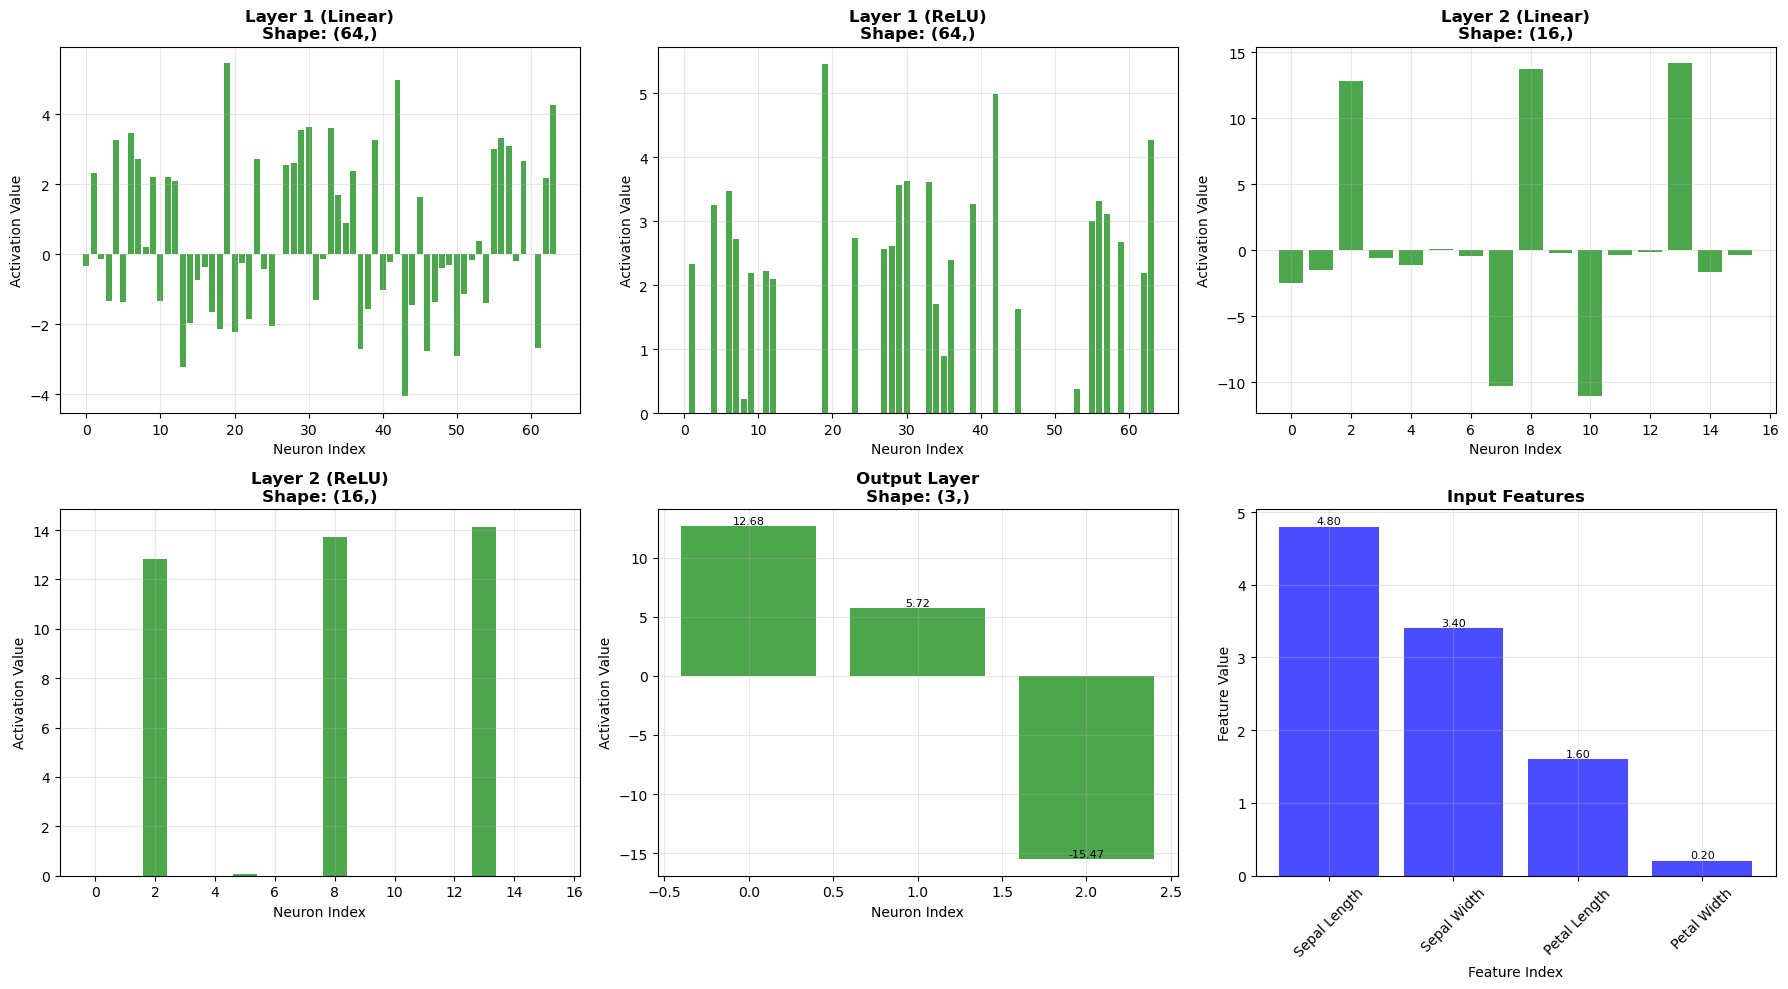

In [20]:
# 4. Activation Visualization
def visualize_activations(model, sample_input):
    """
    Visualize activations at each layer for a sample input
    """
    model.eval()  # Set to evaluation mode
    
    # Forward pass with hooks to capture intermediate activations
    activations = {}
    
    def get_activation(name):
        def hook(model, input, output):
            activations[name] = output.detach()
        return hook
    
    # Register hooks
    model.layer_1.register_forward_hook(get_activation('layer_1'))
    model.activation_1.register_forward_hook(get_activation('activation_1'))
    model.layer_2.register_forward_hook(get_activation('layer_2'))
    model.activation_2.register_forward_hook(get_activation('activation_2'))
    model.layer_3.register_forward_hook(get_activation('layer_3'))
    
    # Forward pass
    with torch.no_grad():
        output = model(sample_input)
    
    # Plot activations
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    activation_names = ['layer_1', 'activation_1', 'layer_2', 'activation_2', 'layer_3']
    titles = ['Layer 1 (Linear)', 'Layer 1 (ReLU)', 'Layer 2 (Linear)', 'Layer 2 (ReLU)', 'Output Layer']
    
    for i, (name, title) in enumerate(zip(activation_names, titles)):
        if i < len(activation_names):
            act = activations[name][0].numpy()  # Take first sample
            
            # Create bar plot for activations
            axes[i].bar(range(len(act)), act, alpha=0.7, 
                       color='green' if act.max() > 0 else 'red')
            axes[i].set_title(f'{title}\nShape: {act.shape}', fontweight='bold')
            axes[i].set_xlabel('Neuron Index')
            axes[i].set_ylabel('Activation Value')
            axes[i].grid(True, alpha=0.3)
            
            # Add value labels for small layers
            if len(act) <= 10:
                for j, val in enumerate(act):
                    axes[i].text(j, val + 0.01, f'{val:.2f}', 
                               ha='center', va='bottom', fontsize=8)
    
    # Plot input data
    input_data = sample_input[0].numpy()
    axes[5].bar(range(len(input_data)), input_data, alpha=0.7, color='blue')
    axes[5].set_title('Input Features', fontweight='bold')
    axes[5].set_xlabel('Feature Index')
    axes[5].set_ylabel('Feature Value')
    axes[5].grid(True, alpha=0.3)
    
    # Add feature names for iris dataset
    feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
    axes[5].set_xticks(range(len(feature_names)))
    axes[5].set_xticklabels(feature_names, rotation=45)
    
    for j, val in enumerate(input_data):
        axes[5].text(j, val + 0.01, f'{val:.2f}', 
                   ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    return activations

# Visualize activations for a sample
sample_input = X_test_tensor[:1]  # Take first test sample
print("Sample input shape:", sample_input.shape)
print("Sample input values:", sample_input[0].numpy())

activations = visualize_activations(model, sample_input)


Decision boundary for Sepal Length vs Sepal Width:


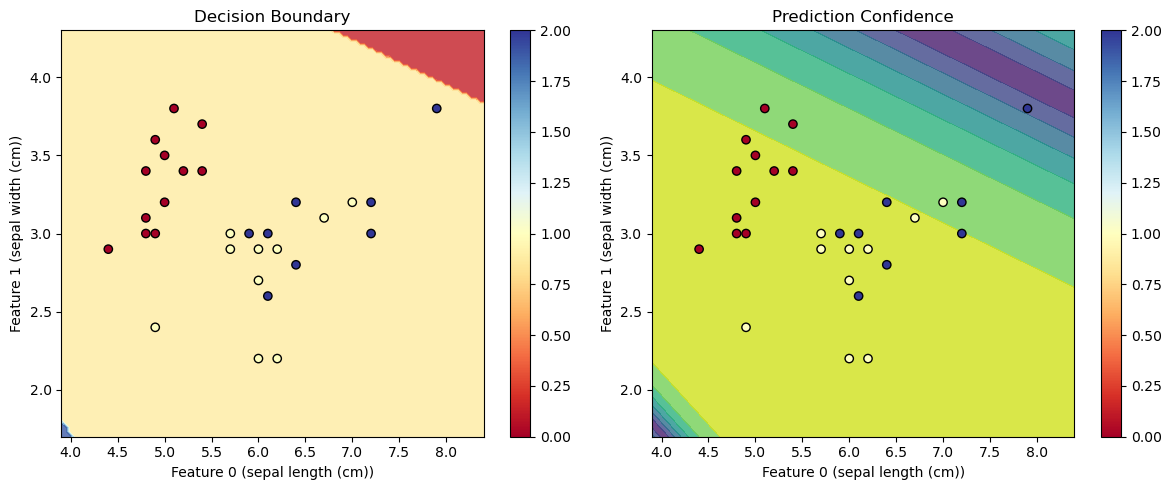


Decision boundary for Petal Length vs Petal Width:


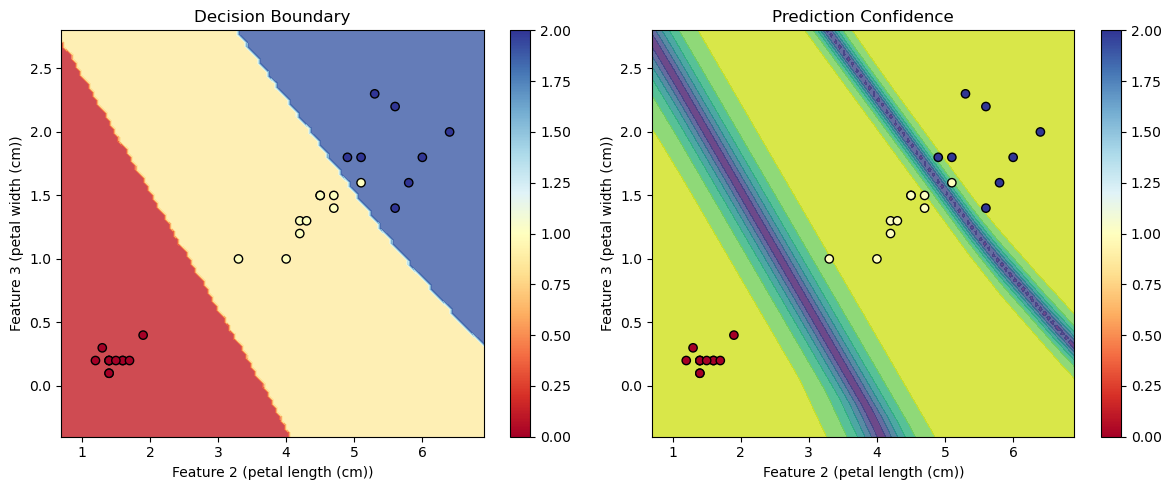

In [21]:
# 5. Decision Boundary Visualization (for 2D feature pairs)
def plot_decision_boundary_2d(model, X, y, feature_pair=(0, 1), resolution=100):
    """
    Plot decision boundary for a 2D slice of the feature space
    """
    # Select two features
    X_2d = X[:, feature_pair]
    
    # Create a mesh
    x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
    y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))
    
    # Create full feature vectors (set other features to mean values)
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    full_mesh = np.zeros((len(mesh_points), X.shape[1]))
    
    # Set the two selected features
    full_mesh[:, feature_pair[0]] = mesh_points[:, 0]
    full_mesh[:, feature_pair[1]] = mesh_points[:, 1]
    
    # Set other features to their mean values
    for i in range(X.shape[1]):
        if i not in feature_pair:
            full_mesh[:, i] = X[:, i].mean()
    
    # Predict
    model.eval()
    with torch.no_grad():
        mesh_tensor = torch.tensor(full_mesh, dtype=torch.float32)
        Z = model(mesh_tensor)
        Z = torch.softmax(Z, dim=1)
        Z = torch.argmax(Z, dim=1).numpy()
    
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(12, 5))
    
    # Plot decision boundary
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlabel(f'Feature {feature_pair[0]} ({iris.feature_names[feature_pair[0]]})')
    plt.ylabel(f'Feature {feature_pair[1]} ({iris.feature_names[feature_pair[1]]})')
    plt.title('Decision Boundary')
    plt.colorbar(scatter)
    
    # Plot prediction confidence
    plt.subplot(1, 2, 2)
    with torch.no_grad():
        mesh_tensor = torch.tensor(full_mesh, dtype=torch.float32)
        Z_prob = model(mesh_tensor)
        Z_prob = torch.softmax(Z_prob, dim=1)
        confidence = torch.max(Z_prob, dim=1)[0].numpy()
    
    confidence = confidence.reshape(xx.shape)
    plt.contourf(xx, yy, confidence, alpha=0.8, cmap=plt.cm.viridis)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlabel(f'Feature {feature_pair[0]} ({iris.feature_names[feature_pair[0]]})')
    plt.ylabel(f'Feature {feature_pair[1]} ({iris.feature_names[feature_pair[1]]})')
    plt.title('Prediction Confidence')
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()

# Plot different feature pairs
feature_pairs = [(0, 1), (2, 3)]
pair_names = [("Sepal Length", "Sepal Width"), ("Petal Length", "Petal Width")]

for pair, names in zip(feature_pairs, pair_names):
    print(f"\nDecision boundary for {names[0]} vs {names[1]}:")
    plot_decision_boundary_2d(model, X_test, y_test, feature_pair=pair)

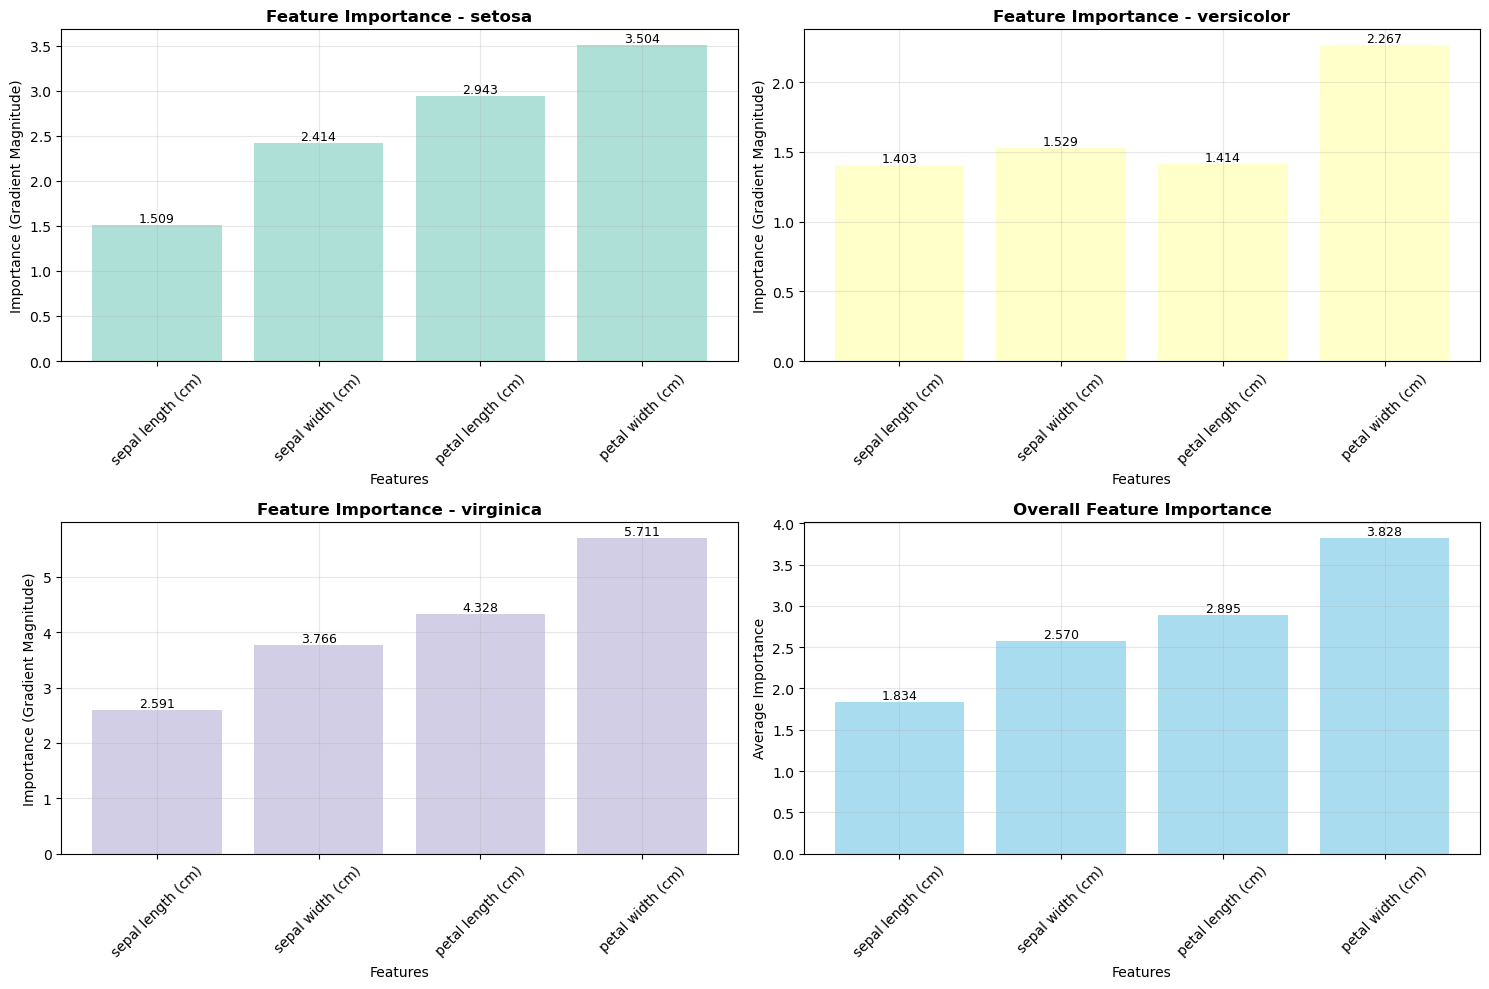

Feature Importance Ranking (Overall):
1. petal width (cm): 3.8275
2. petal length (cm): 2.8947
3. sepal width (cm): 2.5698
4. sepal length (cm): 1.8344


In [22]:
# 6. Feature Importance Visualization
def compute_feature_importance(model, X_sample):
    """
    Compute feature importance using gradient-based method
    """
    model.eval()
    
    # Convert to tensor and enable gradient computation
    X_tensor = torch.tensor(X_sample, dtype=torch.float32, requires_grad=True)
    
    # Forward pass
    output = model(X_tensor)
    
    # Compute gradients for each class
    feature_importance = np.zeros((len(iris.target_names), X_sample.shape[1]))
    
    for class_idx in range(len(iris.target_names)):
        # Backward pass for this class
        if X_tensor.grad is not None:
            X_tensor.grad.zero_()
        
        class_score = output[:, class_idx].sum()
        class_score.backward(retain_graph=True)
        
        # Store gradients
        gradients = X_tensor.grad.data.numpy()
        feature_importance[class_idx] = np.mean(np.abs(gradients), axis=0)
    
    return feature_importance

# Compute feature importance
sample_data = X_test[:10]  # Use first 10 test samples
feature_importance = compute_feature_importance(model, sample_data)

# Plot feature importance
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for each class
for class_idx in range(len(iris.target_names)):
    row, col = class_idx // 2, class_idx % 2
    
    bars = axes[row, col].bar(range(len(iris.feature_names)), 
                             feature_importance[class_idx],
                             alpha=0.7, color=plt.cm.Set3(class_idx))
    
    axes[row, col].set_title(f'Feature Importance - {iris.target_names[class_idx]}', 
                            fontweight='bold')
    axes[row, col].set_xlabel('Features')
    axes[row, col].set_ylabel('Importance (Gradient Magnitude)')
    axes[row, col].set_xticks(range(len(iris.feature_names)))
    axes[row, col].set_xticklabels(iris.feature_names, rotation=45)
    axes[row, col].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                           f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Overall feature importance (average across classes)
overall_importance = np.mean(feature_importance, axis=0)
bars = axes[1, 1].bar(range(len(iris.feature_names)), overall_importance,
                     alpha=0.7, color='skyblue')

axes[1, 1].set_title('Overall Feature Importance', fontweight='bold')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Average Importance')
axes[1, 1].set_xticks(range(len(iris.feature_names)))
axes[1, 1].set_xticklabels(iris.feature_names, rotation=45)
axes[1, 1].grid(True, alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print feature importance ranking
print("Feature Importance Ranking (Overall):")
feature_ranking = sorted(zip(iris.feature_names, overall_importance), 
                        key=lambda x: x[1], reverse=True)
for i, (feature, importance) in enumerate(feature_ranking, 1):
    print(f"{i}. {feature}: {importance:.4f}")